In [3]:
import numpy as np
from qiskit import *
from qiskit.tools.visualization import plot_histogram

In [57]:
q = QuantumRegister(8)
c = ClassicalRegister(8)
circuit = QuantumCircuit(q,c)


circuit.h(q[0])
circuit.h(q[1])

circuit.h(q[2])
circuit.h(q[3])
circuit.h(q[4])
circuit.h(q[5])

#circuit.h(q[6])
##circuit.h(q[7])
circuit.x(2)
circuit.ccx(0,1,6)
circuit.ccx(5,6,7) #!B!A=>I3
circuit.ccx(0,1,6)

circuit.x(0)

circuit.ccx(0,1,6)
circuit.ccx(4,6,7)#B!A=>I1 
circuit.ccx(0,1,6)

circuit.x(1)

circuit.ccx(0,1,6)
circuit.ccx(2,6,7)#!B!A=>I0
circuit.ccx(0,1,6)

circuit.x(0)

circuit.ccx(0,1,6)
circuit.ccx(3,6,7)#!BA=>I2
circuit.ccx(0,1,6)

circuit.x(1)

circuit.measure(q,c)

In [58]:
circuit.draw()


Total count are:
00111000 -> 25
10011010 -> 23
00101000 -> 23
00000000 -> 22
00010111 -> 22
10011101 -> 22
00010000 -> 21
00011000 -> 21
00100001 -> 20
10000100 -> 20
00000111 -> 19
10101001 -> 19
00100110 -> 19
00110001 -> 18
10001101 -> 18
00000011 -> 18
00100000 -> 18
00001000 -> 18
10010100 -> 18
00010101 -> 18
10100111 -> 18
10011100 -> 17
10110111 -> 17
00001111 -> 17
00011111 -> 17
10111010 -> 17
10111101 -> 17
00100010 -> 16
10110100 -> 16
00001110 -> 16
10111100 -> 16
10111001 -> 15
10101101 -> 15
10110010 -> 15
00011011 -> 15
10111011 -> 15
10001001 -> 14
10010110 -> 14
10101111 -> 14
10100100 -> 14
00110101 -> 14
10101100 -> 14
00001010 -> 13
00000101 -> 13
00000110 -> 13
10110110 -> 13
00010001 -> 13
00100101 -> 12
10010010 -> 12
10110011 -> 12
00000001 -> 12
00000010 -> 12
00001011 -> 12
00010011 -> 12
10001100 -> 12
10101011 -> 12
10011110 -> 11
00101010 -> 11
10111111 -> 11
10100011 -> 11
00110000 -> 11
10111110 -> 10
00101110 -> 10
10011001 -> 7


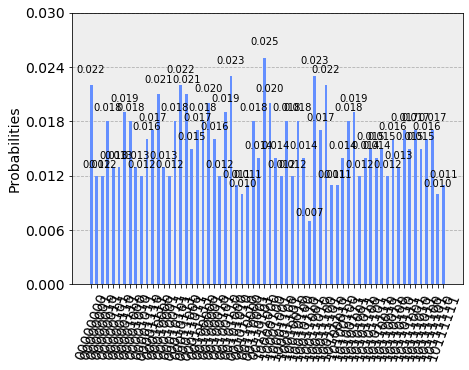

In [60]:
simulator = Aer.get_backend('qasm_simulator')
job = execute(circuit, simulator, shots=1000)
result = job.result()
counts = result.get_counts(circuit)
print("\nTotal count are:")#,counts)
sorted_x = sorted(counts.items(), key=lambda kv: kv[1],reverse=True)
import collections
sorted_dict = collections.OrderedDict(sorted_x)
for cnt in sorted_dict.keys():
    print(str(cnt)+" -> "+str(sorted_dict[cnt]))
plot_histogram(counts)

Result(backend_name='statevector_simulator', backend_version='0.3.2', date=datetime.datetime(2019, 11, 13, 8, 13, 35, 556108), header=Obj(backend_name='statevector_simulator', backend_version='0.3.2'), job_id='24166f82-fe72-4d14-ad30-d7972de9852f', metadata={'max_memory_mb': 4033, 'omp_enabled': True, 'parallel_experiments': 1, 'time_taken': 0.0001377}, qobj_id='f3535b15-e2f1-44de-abaf-dec339ddb1d4', results=[ExperimentResult(data=ExperimentResultData(counts=Obj(0xb=1), statevector=[0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, (1+0j), 0j, 0j, 0j, 0j]), header=Obj(clbit_labels=[['c3', 0], ['c3', 1], ['c3', 2], ['c3', 3]], creg_sizes=[['c3', 4]], memory_slots=4, n_qubits=4, name='circuit3', qreg_sizes=[['q3', 4]], qubit_labels=[['q3', 0], ['q3', 1], ['q3', 2], ['q3', 3]]), meas_level=2, metadata={'parallel_shots': 1, 'parallel_state_update': 8}, seed_simulator=3130050991, shots=1, status='DONE', success=True, time_taken=6.25e-05)], status='COMPLETED', success=True, time_taken=0.0099639892

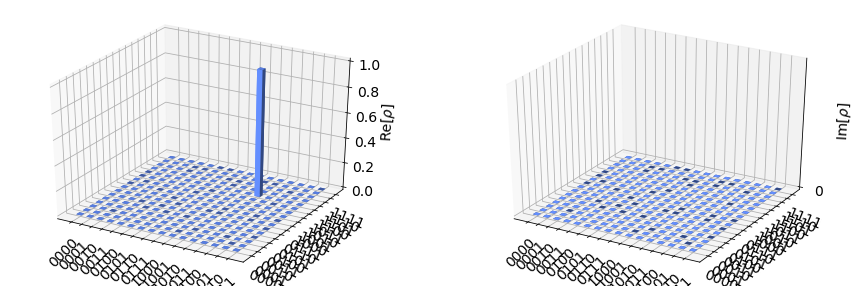

In [9]:
backend = Aer.get_backend('statevector_simulator')
job1 = execute(circuit, backend, shots=1000)
job1 = execute(circuit, backend, shots=1000)
result1 = job1.result()

print(result1)
outputstate = result1.get_statevector(circuit, decimals=3)
print(outputstate)
from qiskit.visualization import plot_state_city
plot_state_city(outputstate)